In [1]:
from gidnet_qubit_reuse_algorithm.gidnet_qra import (safe_eval,
                                                     create_qiskit_and_qnet_GRCS_circuits,
                                                     compute_qubit_reuse_sets, 
                                                    compile_dynamic_circuit)
import time
import os

In [2]:
circuit_sizes = ["4x4", "4x5", "5x5", "5x6", "6x6", "6x7", "7x7", "7x8", "8x8", "8x9",
                "9x9", "9x10", "10x10", "10x11", "11x11", "11x12", "12x12"]

directory_path = "../data"
cycle_num = 10


gidnet_plus_average_time = []
gidnet_plus_std_time = []
gidnet_plus_qubit_width = []

for i, num_qubits in enumerate(circuit_sizes):
    print("circuit", i+1, "running")
    qiskit_circuit, _ = create_qiskit_and_qnet_GRCS_circuits(num_qubits, cycle_num, directory_path)

    gidnet_plus_time = %timeit -o compile_dynamic_circuit(qiskit_circuit, algorithm_type="gidnet", improved_gidnet=True)

    compiled_gidnet_circuit = compile_dynamic_circuit(qiskit_circuit, algorithm_type="gidnet",
                                                      improved_gidnet=True)

    # Data colation
    gidnet_plus_average_time.append(gidnet_plus_time.average)
    gidnet_plus_std_time.append(gidnet_plus_time.stdev)
    gidnet_plus_qubit_width.append(compiled_gidnet_circuit.num_qubits)


circuit 1 running
55.8 ms ± 6.78 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
circuit 2 running
82.6 ms ± 8.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
circuit 3 running
135 ms ± 10.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
circuit 4 running
263 ms ± 44.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 5 running
406 ms ± 11.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 6 running
743 ms ± 51.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 7 running
1.38 s ± 144 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 8 running
2.19 s ± 183 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 9 running
3.53 s ± 269 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 10 running
5.42 s ± 149 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 11 running
9.09 s ± 236 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
circuit 12 running
13.6 s ± 85.1 ms per loop (mea

In [7]:
circuit_sizes = ["4x4", "4x5", "5x5", "5x6", "6x6", "6x7", "7x7", "7x8", "8x8", "8x9",
                "9x9", "9x10", "10x10", "10x11", "11x11", "11x12", "12x12"]

directory_path = "../data"
cycle_num = 10


gidnet_plus_average_time = []
gidnet_plus_std_time = []
gidnet_plus_qubit_width = []

num_qubits = "4x4"
# for i, num_qubits in enumerate(circuit_sizes):
#     print("circuit", i+1, "running")
qiskit_circuit, _ = create_qiskit_and_qnet_GRCS_circuits(num_qubits, cycle_num, directory_path)

# gidnet_plus_time = %timeit -o compile_dynamic_circuit(qiskit_circuit, algorithm_type="gidnet", improved_gidnet=True)

# compiled_gidnet_circuit = compile_dynamic_circuit(qiskit_circuit, algorithm_type="gidnet",
                                                  # improved_gidnet=True)

# Data colation
# gidnet_plus_average_time.append(gidnet_plus_time.average)
# gidnet_plus_std_time.append(gidnet_plus_time.stdev)
# gidnet_plus_qubit_width.append(compiled_gidnet_circuit.num_qubits)


In [10]:
qiskit_circuit.depth()

12

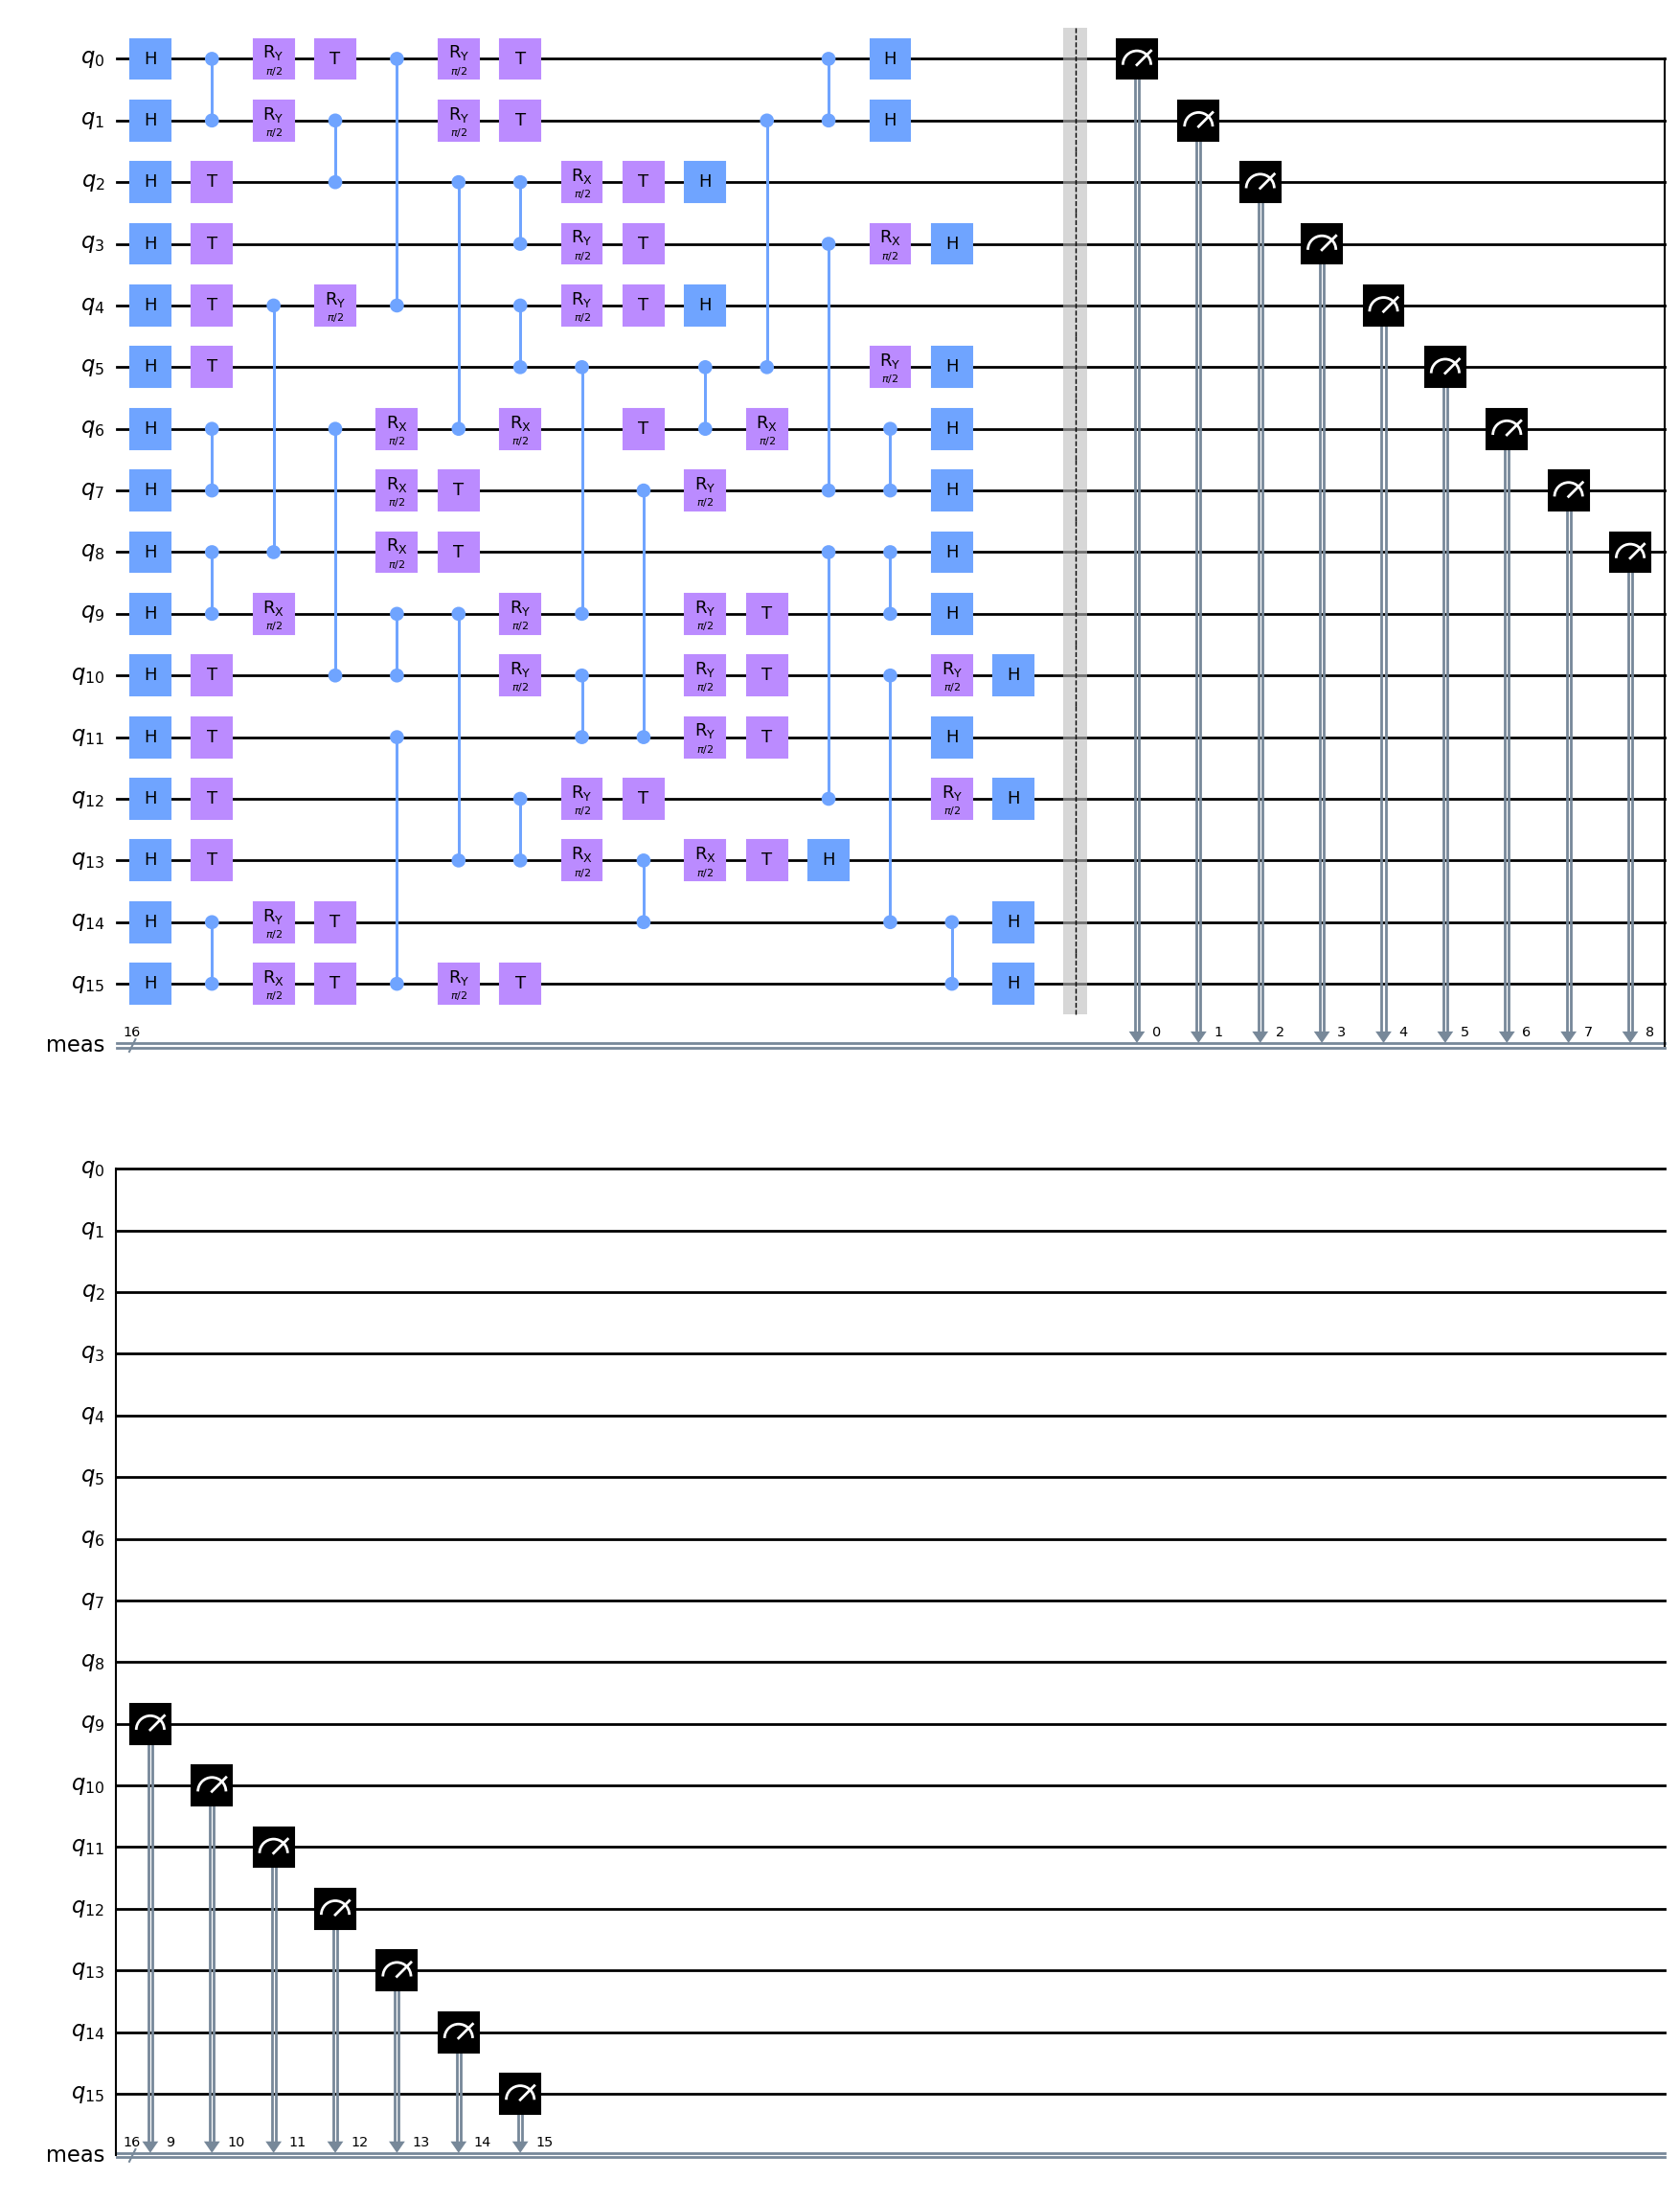

In [11]:
qiskit_circuit.draw("mpl")

In [3]:
import pandas as pd
# Convert lists to a dictionary
data = {
    'Circuit Sizes': [safe_eval(s) for s in circuit_sizes],
    'GidNET Average Runtime': gidnet_plus_average_time,  # Added comma
    'GidNET Stdev Runtime': gidnet_plus_std_time,  # Added comma
    'GidNET Width': gidnet_plus_qubit_width,
}

# Assuming pandas is imported as pd
import pandas as pd

# Convert dictionary to DataFrame
df = pd.DataFrame(data)

# Save DataFrame to CSV
df.to_csv('data_supremacy_cct/GidNET_width_and_runtime_supremacy_cct_cycle_10_data.csv', index=False)


In [4]:
df

,Circuit Sizes,GidNET Average Runtime,GidNET Stdev Runtime,GidNET Width
0,16,0.055775,0.006775,9
1,20,0.082587,0.008005,10
2,25,0.134670,0.010131,11
3,30,0.262965,0.044817,12
4,36,0.405778,0.011553,15
5,42,0.742555,0.051349,16
6,49,1.382439,0.144403,17
7,56,2.187620,0.182864,19
8,64,3.529260,0.268545,20
9,72,5.424806,0.148957,21
